Easy 1st run on amazon dataset:
- Load small subset of data
- check if its 50/50 pos/neg like the full file

This is done by tfidf vectorizer from sklearn:
- make everything lowecase
- filter out symbols (?!.^)
- remove stopwords

Additional work:
- stemming? lemmatization?

stemming = find common root and remove suffices eg 'flooding' --> 'flood
lemmatization = identify inflected forms and return base eg 'better' --> good

In [1]:
import os

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

from sklearn.feature_extraction.text import TfidfVectorizer


%matplotlib inline


In [2]:
train_path = os.path.join('raw_data', 'train.csv')

n_rows = 10_000

df = pd.read_csv(train_path, 
                 nrows=n_rows, 
                 header=None,
                 names=['label', 'title', 'review'])
df.replace({'label': {1:0, 2:1}}, inplace=True)

df.head()

,label,title,review
0,1,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,1,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,1,Amazing!,This soundtrack is my favorite music of all ti...
3,1,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,1,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."


In [3]:
df.shape

(10000, 3)

In [4]:
df['label'].mean()

0.4903

In [5]:
df.isna().mean()

label     0.0
title     0.0
review    0.0
dtype: float64

In [6]:
#merge title+review into one column
df['text'] = df['title'] + df['review']
df = df.drop(labels=['title', 'review'], axis=1)
df.head(2)

,label,text
0,1,Stuning even for the non-gamerThis sound track...
1,1,The best soundtrack ever to anything.I'm readi...


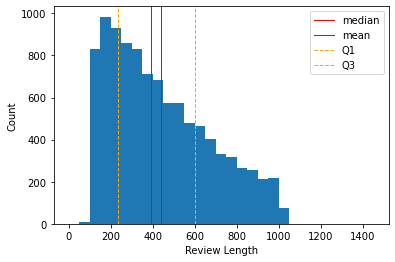

In [7]:
text_len = pd.Series([len(x) for x in df['text']])

plt.hist(text_len, 
         bins=np.arange(0, 1500, 50)
        )
plt.xlabel('Review Length')
plt.ylabel('Count')
    
#stats
plt.axvline(text_len.median(), color='red',linestyle='solid', linewidth=1, label='median')
plt.axvline(text_len.mean(), color='green',linestyle='solid', linewidth=1, label='mean')
plt.axvline(text_len.describe()['25%'], color='orange',linestyle='dashed', linewidth=1, label='Q1')
plt.axvline(text_len.describe()['75%'], color='orange',linestyle='dashed', linewidth=1, label='Q3')
    
plt.legend()
    
plt.show()

In [8]:
tfidf = TfidfVectorizer(strip_accents='ascii', 
                        lowercase=True,
                        analyzer = 'word',
                        stop_words='english',
                        token_pattern = r'(?u)\b\w\w+\b',
                        max_df = 0.9,
                        min_df = 5
                       )
X = tfidf.fit_transform(df['text'])
y = df['label']

In [9]:
#get feature array
feature_array = np.array(tfidf.get_feature_names())

#get sorted indeces
tfidf_sorting = np.argsort(X.toarray()).flatten()[::-1]

k_tfidf = 20
print("{} features with HIGHEST tifdf: \n{}".format(k_tfidf,
                                                    feature_array[tfidf_sorting][:k_tfidf]))
print("{} features with LOWEST tifdf: \n{}".format(k_tfidf,
                                                   feature_array[tfidf_sorting][-k_tfidf:]))


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


20 features with HIGHEST tifdf: 
['pen' 'amazon' 'trim' 'vendors' 'thankful' 'someday' 'golden'
 'electronics' 'promptly' 'gifted' 'delivery' 'holds' 'mom' 'shipped'
 'plan' 'present' 'parents' 'color' 'black' 'gift']
20 features with LOWEST tifdf: 
['popping' 'pops' 'popular' 'popularity' 'population' 'por' 'porn' 'port'
 'portability' 'portable' 'portion' 'portions' 'portrait' 'portray'
 'portrayal' 'portrayed' 'portrays' 'ports' 'pose' '00']
